In [61]:
!pip3 install torch
!pip3 install matplotlib

In [2]:
words = open("names.txt", 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

In [ ]:
b = {}
for w in words:
  chs = ["<S>"] + list(w) + ["<E>"]
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

print(b)

{('<S>', 'e'): 1531, ('e', 'm'): 769, ('m', 'm'): 168, ('m', 'a'): 2590, ('a', '<E>'): 6640, ('<S>', 'o'): 394, ('o', 'l'): 619, ('l', 'i'): 2480, ('i', 'v'): 269, ('v', 'i'): 911, ('i', 'a'): 2445, ('<S>', 'a'): 4410, ('a', 'v'): 834, ('v', 'a'): 642, ('<S>', 'i'): 591, ('i', 's'): 1316, ('s', 'a'): 1201, ('a', 'b'): 541, ('b', 'e'): 655, ('e', 'l'): 3248, ('l', 'l'): 1345, ('l', 'a'): 2623, ('<S>', 's'): 2055, ('s', 'o'): 531, ('o', 'p'): 95, ('p', 'h'): 204, ('h', 'i'): 729, ('<S>', 'c'): 1542, ('c', 'h'): 664, ('h', 'a'): 2244, ('a', 'r'): 3264, ('r', 'l'): 413, ('l', 'o'): 692, ('o', 't'): 118, ('t', 't'): 374, ('t', 'e'): 716, ('e', '<E>'): 3983, ('<S>', 'm'): 2538, ('m', 'i'): 1256, ('a', 'm'): 1634, ('m', 'e'): 818, ('<S>', 'h'): 874, ('r', 'p'): 14, ('p', 'e'): 197, ('e', 'r'): 1958, ('r', '<E>'): 1377, ('e', 'v'): 463, ('v', 'e'): 568, ('l', 'y'): 1588, ('y', 'n'): 1826, ('n', '<E>'): 6763, ('b', 'i'): 217, ('i', 'g'): 428, ('g', 'a'): 330, ('a', 'i'): 1650, ('i', 'l'): 1345,

In [90]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [31]:
import torch

In [32]:
a = torch.zeros(3, 5, dtype = torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [34]:
a[1][3] +=1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [233]:
N = torch.zeros((27, 27), dtype = torch.int32)

In [234]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi["."] = 0
stoi


{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [236]:
for w in words:
  chs = ["."] + list(w) + ["."]
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1][ix2] += 1

In [237]:
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [238]:
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

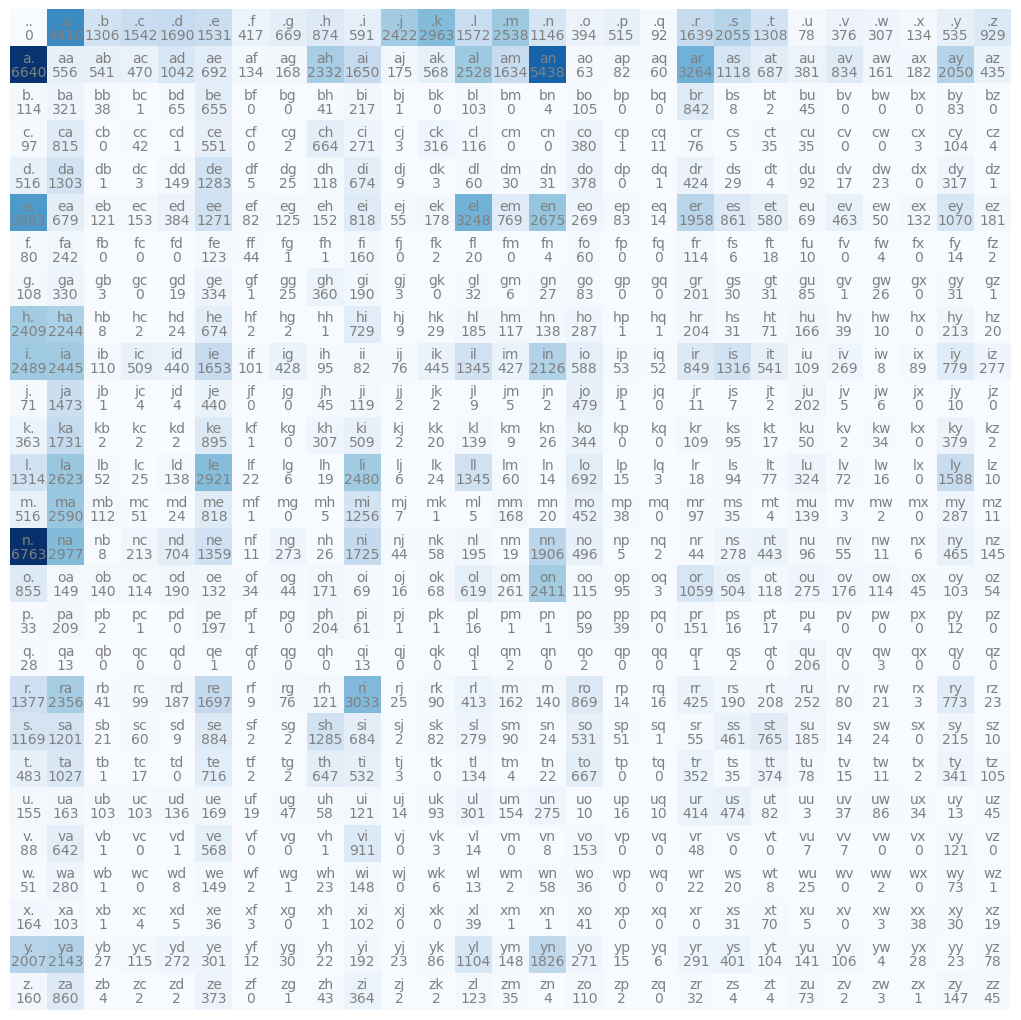

In [395]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (13,13))
plt.imshow(N, cmap = "Blues")
for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")

plt.axis('off')
plt.show()

In [241]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [334]:
p = N[0].float()
print(p.sum(), "P SUM")
p = p / p.sum()
print(p, "P")

tensor(32033.) P SUM
tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290]) P


In [291]:
g = torch.Generator().manual_seed(2147483647)
torch.multinomial(p, num_samples=3, replacement=True, generator=g)

tensor([13, 19, 14])

In [292]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3,generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [293]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [340]:
P.shape

torch.Size([27, 27])

In [366]:
P = N.float()
print(P.sum())
P = P/P.sum(1, keepdim= True)
print(P.sum())

tensor(228146.)
tensor(27.)


In [347]:
rv = P.sum(1)
print(rv)

tensor([7.0225, 4.4142, 0.2009, 0.3717, 0.4146, 2.2968, 0.1063, 0.2065, 0.4567,
        2.3526, 0.2220, 0.3551, 1.0512, 0.4841, 1.3317, 1.1396, 0.1160, 0.0719,
        1.1012, 0.8395, 0.5237, 0.5898, 0.1441, 0.0669, 0.1164, 0.8289, 0.1753])


In [ ]:
P = N.float()
P = P/P.sum(1)
print(P.sum())
P

tensor(27.0000)


tensor([[0.0000e+00, 1.3015e-01, 4.9376e-01, 4.3658e-01, 3.0750e-01, 7.4965e-02,
         4.6077e-01, 3.4717e-01, 1.1476e-01, 3.3388e-02, 8.3517e-01, 5.8790e-01,
         1.1262e-01, 3.8211e-01, 6.2531e-02, 4.9660e-02, 5.0195e-01, 3.3824e-01,
         1.2906e-01, 2.5352e-01, 2.3483e-01, 2.4880e-02, 1.4613e-01, 3.3046e-01,
         1.9225e-01, 5.4726e-02, 3.8741e-01],
        [2.0729e-01, 1.6408e-02, 2.0454e-01, 1.3307e-01, 1.8959e-01, 3.3883e-02,
         1.4807e-01, 8.7182e-02, 3.0620e-01, 9.3215e-02, 6.0345e-02, 1.1270e-01,
         1.8111e-01, 2.4601e-01, 2.9672e-01, 7.9405e-03, 7.9922e-02, 2.2059e-01,
         2.5701e-01, 1.3792e-01, 1.2334e-01, 1.2153e-01, 3.2414e-01, 1.7330e-01,
         2.6112e-01, 2.0970e-01, 1.8140e-01],
        [3.5588e-03, 9.4732e-03, 1.4367e-02, 2.8313e-04, 1.1827e-02, 3.2072e-02,
         0.0000e+00, 0.0000e+00, 5.3834e-03, 1.2259e-02, 3.4483e-04, 0.0000e+00,
         7.3793e-03, 0.0000e+00, 2.1826e-04, 1.3234e-02, 0.0000e+00, 0.0000e+00,
         6.6299e-

In [368]:
cv = P.sum(1, keepdim = True)
print(cv)

tensor([[7.0225],
        [4.4142],
        [0.2009],
        [0.3717],
        [0.4146],
        [2.2968],
        [0.1063],
        [0.2065],
        [0.4567],
        [2.3526],
        [0.2220],
        [0.3551],
        [1.0512],
        [0.4841],
        [1.3317],
        [1.1396],
        [0.1160],
        [0.0719],
        [1.1012],
        [0.8395],
        [0.5237],
        [0.5898],
        [0.1441],
        [0.0669],
        [0.1164],
        [0.8289],
        [0.1753]])


In [ ]:
P = (N + 1).float()
P = P / P.sum(1,keepdim=True)
print(P[0])

tensor([3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
        1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
        4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
        5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
        4.2109e-03, 1.6719e-02, 2.9008e-02])


In [ ]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples = 1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

# for i in range(5):
#   out = []
#   ix = 0
#   while True:
#     xenc = F.one_hot(torch.tensor([ix]), num_classes = 27).float()
#     logits = xenc @ w
#     counts = logits.exp()
#     probs = counts / counts.sum(1, keepdims=True)
  
#     ix = torch.multinomial(probs, num_samples = 1, replacement=True, generator=g).item()
#     out.append(itos[ix])
#     if ix == 0:
#       break
#   print(''.join(out))

zexzmkloglquszipczktxhkmpmzisttt.
inmlufbkzkkt.
g.
zwmxtpucjwtsc.
gmtokmxczislwtxugkwpt.


In [ ]:
# GOAL: maximize liklihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log liklihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [649]:
log_likelihood = 0.0
n = 0

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n+=1
    # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f"{log_likelihood=}")
nll = -log_likelihood
print(f"{nll=}")
print(f"{nll/n}")


log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [654]:
xs, ys = [], []

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(num)

228146


In [ ]:
xs

228146

In [571]:
ys

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [ ]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes = 27).float()

In [449]:
xenc.dtype

torch.float32

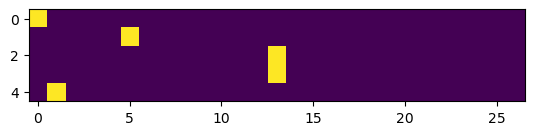

In [450]:
plt.imshow(xenc)
plt.show()

In [658]:
g = torch.Generator().manual_seed(2147483647)
w = torch.randn((27, 27), generator = g, requires_grad=True)

In [602]:
xenc = F.one_hot(xs, num_classes = 27).float()
logits = xenc @ w
counts = logits.exp()
probs = counts / counts.sum(1, keepdims = True)

In [603]:
nlls = torch.zeros(5)
for i in range(5):
  x = xs[i].item()
  y = ys[i].item()
  print('---------')
  print(f'bigram example {i + 1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the correct character', p.item())
  logp = torch.log(p)
  print('log likelihood', logp.item())
  nll = -logp
  print('negative log likelihood', nll.item())
  nlls[i] = nll

print('=============')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())


---------
bigram example 1: .e (indexes 0, 5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)
label (actual next character): 5
probability assigned by the net to the correct character 0.012286250479519367
log likelihood -4.3992743492126465
negative log likelihood 4.3992743492126465
---------
bigram example 2: em (indexes 5, 13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
       grad_fn=<SelectBackward0>)
label (actual next character):

In [604]:
print(probs.shape)
print(probs)

torch.Size([228146, 27])
tensor([[0.0607, 0.0100, 0.0123,  ..., 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248,  ..., 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484,  ..., 0.1204, 0.0469, 0.0126],
        ...,
        [0.0301, 0.0080, 0.0090,  ..., 0.0125, 0.0531, 0.0111],
        [0.0634, 0.0270, 0.0101,  ..., 0.0833, 0.0175, 0.0517],
        [0.0308, 0.0113, 0.0178,  ..., 0.0190, 0.0116, 0.0562]],
       grad_fn=<DivBackward0>)


In [605]:
probs.shape

torch.Size([228146, 27])

In [607]:
probs[0, 5], probs[1,13], probs[2,13], probs[3,1], probs[4,0]

(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

In [627]:
# all steps for forward prob
# xenc = F.one_hot(xs, num_classes=27).float()
# # w = 27 x 27 weights
# logits = xenc @ w
# counts = logits.exp()
# probs = counts / counts.sum(1, keepdim=True)
loss = -probs[torch.arange(num), ys].log().mean()
print(loss.item())


2.462392568588257


In [628]:
# backward propagation
w.grad = None
loss.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [610]:
w.shape

torch.Size([27, 27])

In [611]:
w.grad

tensor([[ 8.5187e-03, -1.7932e-02, -3.9946e-03, -6.1666e-03, -5.0419e-03,
         -4.9847e-03, -1.4500e-03,  3.2134e-04, -1.9074e-03,  1.7998e-03,
         -9.5090e-03, -9.0822e-03, -5.6086e-03, -9.9701e-03,  1.9905e-03,
          3.1672e-02,  6.2150e-03, -5.3711e-05, -3.6862e-03, -8.2429e-03,
         -9.7536e-04,  1.1905e-03, -1.2431e-03,  1.4363e-03,  1.0684e-03,
          1.9234e-02,  1.6416e-02],
        [-2.6891e-02, -1.1534e-03,  3.5147e-03, -5.7264e-04,  4.4331e-03,
          1.5427e-03,  1.5513e-02,  1.2124e-03, -8.3622e-03, -6.5209e-03,
          1.4444e-02, -1.2131e-03,  3.5937e-03, -5.5054e-03, -2.0389e-02,
          2.7935e-03,  5.7008e-03,  8.9093e-04, -9.4973e-04,  2.9907e-03,
          3.8665e-03,  2.9198e-03, -2.8925e-03,  4.1757e-03,  8.9090e-03,
         -1.5171e-03, -5.4999e-04],
        [-2.1135e-04, -1.3155e-03,  1.9726e-04,  3.9497e-04, -1.8479e-04,
         -2.7572e-03,  2.8475e-04,  2.0133e-04, -9.1832e-05, -8.9761e-04,
          6.3085e-04,  1.0288e-04,  9.74

In [ ]:
print(w[0]) 
w.data += -0.01 * w.grad
print(w[0]) # this value should be lower by a factor of the gradient

tensor([ 1.5677, -0.2372, -0.0273, -1.1008,  0.2860, -0.0356, -1.5470,  0.6050,
         0.0792,  0.9048, -0.4712,  0.7870, -0.3284, -0.4329,  1.3732,  2.9348,
         1.5621, -1.6260,  0.6773, -0.8404,  0.9851, -0.1483, -1.4795,  0.4484,
        -0.0707,  2.4977,  2.4457], grad_fn=<SelectBackward0>)
tensor([ 1.5676, -0.2373, -0.0273, -1.1008,  0.2859, -0.0336, -1.5470,  0.6050,
         0.0792,  0.9047, -0.4712,  0.7869, -0.3284, -0.4329,  1.3731,  2.9343,
         1.5620, -1.6260,  0.6773, -0.8404,  0.9850, -0.1483, -1.4795,  0.4484,
        -0.0707,  2.4974,  2.4454], grad_fn=<SelectBackward0>)


In [ ]:
for k in range(100):
  xenc = F.one_hot(xs, num_classes = 27).float()
  logits = xenc @ w
  counts = logits.exp()
  probs = counts / counts.sum(1, keepdim=True)
  loss = -probs[torch.arange(num), ys].log().mean()
  print(loss.item())
  # the loss we expect here should be what we calculated for the normalization of the original dataset (about 2.454...)

  w.grad = None
  loss.backward()

  w.data += -50 * w.grad

2.456423282623291
2.456418991088867
2.4564144611358643
2.4564099311828613
2.4564054012298584
2.4564011096954346
2.4563965797424316
2.4563920497894287
2.456387519836426
2.456383228302002
2.456378698348999
2.456374406814575
2.4563701152801514
2.4563658237457275
2.4563615322113037
2.45635724067688
2.456352949142456
2.4563486576080322
2.4563443660736084
2.4563398361206055
2.4563355445861816
2.456331491470337
2.456327199935913
2.4563231468200684
2.4563190937042236
2.4563148021698
2.456310510635376
2.4563064575195312
2.4563021659851074
2.456298351287842
2.456294059753418
2.4562900066375732
2.4562859535217285
2.456281900405884
2.456278085708618
2.4562735557556152
2.4562697410583496
2.456265926361084
2.45626163482666
2.4562578201293945
2.456254005432129
2.456249952316284
2.4562461376190186
2.4562418460845947
2.456238031387329
2.4562342166900635
2.456230401992798
2.4562265872955322
2.4562227725982666
2.456218719482422
2.4562149047851562
2.4562110900878906
2.456207275390625
2.4562034606933594
2.